<div style='background-color: cyan'>
<a id='TableOfContents'></a>
    <b><u><i><h1 style='text-align: center'>
        Table of Contents
    </h1></i></u></b>
<li><a href='#imports'>Imports</a></li>
<li><a href='#wrangle'>Wrangle</a></li>
<li><a href='#explore'>Exploration</a></li>
<li><a href='#model'>Modeling</a></li>
<li><a href='#conclusion'>Conclusion</a></li>

<div style='background-color: cyan'>
<a id='imports'></a>
    <b><u><i><h1 style='text-align: center'>
        Imports
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [1]:
# Import 'final.py' to expedite and maintain cleanliness
import final as f
import warnings
warnings.filterwarnings("ignore")

<div style='background-color: cyan'>
<a id='wrangle'></a>
    <b><u><i><h1 style='text-align: center'>
        Wrangle
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

---

<h3><b>Acquire and Prepare</b></h3>

- Acquisition
    - Web Scraping
        - Data was aquired by webscraping the PGA tour website. We looped through every year available, 1987 to 2023 scraping data from three different statistic sources on this website; driving distance, average par 4 score, and average par 5 score.
- Merging
    - Making something usefull
        - After scraping these webpages, we extracted the desired data into thier 3 respective dataframes. We then merged them together into one, stratifying on the year and player feature to promote data integrity.
- Prepare
    - Clean and Audit
        - We pulled random samples and audited the data to ensure it merged correctly without errors. We removed any nonsensical or rundundant columns caused by the merge, and renamed columns to promote readability. 

In [2]:
# From the 'final.py' file...
# Get the prepared dataframe of {DATA NAME} dataset
df = f.acquire_data()
df.shape

(7048, 5)

- Prepared 'prep_data' shape:
    - Rows: 7048
    - Columns: 5

---

<h3><b>Group by year</b></h3>

In [3]:
# From the 'final.py' file...
# Call function to group the df by year using mean
df_by_yr = f.get_df_by_year(df)

<h3><b>Split</b></h3>

In [4]:
# From the 'final.py' file...
# Call function to split the df
train, validate, test = f.tts(df_by_yr)

- Train
    - 70%
- Validate
    - 20%
- Test
    - 10%

<div style='background-color: cyan'>
<a id='explore'></a>
    <b><u><i><h1 style='text-align: center'>
        Exploration
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#visuals'>Key Visuals</a></li>
<li><a href='#exploresummary'>Summary</a></li>

<a id='visuals'></a>
<h3><b>Key Visuals</b></h3>
<li><a href='#explore'>Exploration Top</a></li>

<b>How has the average driving distance increased over time?</b> 

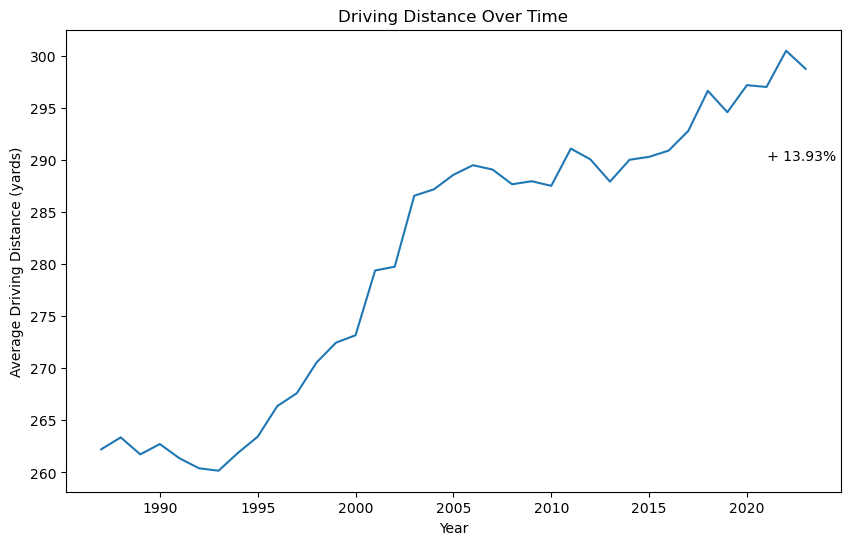

In [5]:
# From the 'final.py' file...
# Get the plot visualizing driving dist over time
f.dist_over_time(df_by_yr)

**We can see here that average driving distance has increased significantly since the late 80's, with a dramatic increase from the early 90's to mid 00's.**

<b>How has par 4 and par 5 scoring changed over time?</b> 

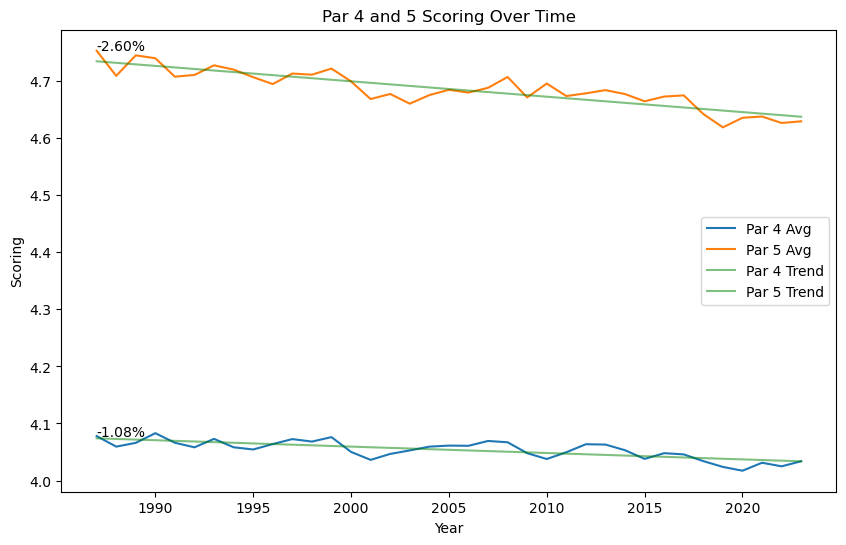

In [6]:
# From the 'final.py' file...
# Call function to display par 4&5 scoring vis
f.scoring_over_time(df_by_yr)

We can see here that while average drive distance has increased nearly 14% since the late 80's, average par 5 scores have improved 2.6% while average par 4 scores have improved 1.08%. 

---

<b>Have changes to golf clubs influenced driving distance?</b> 

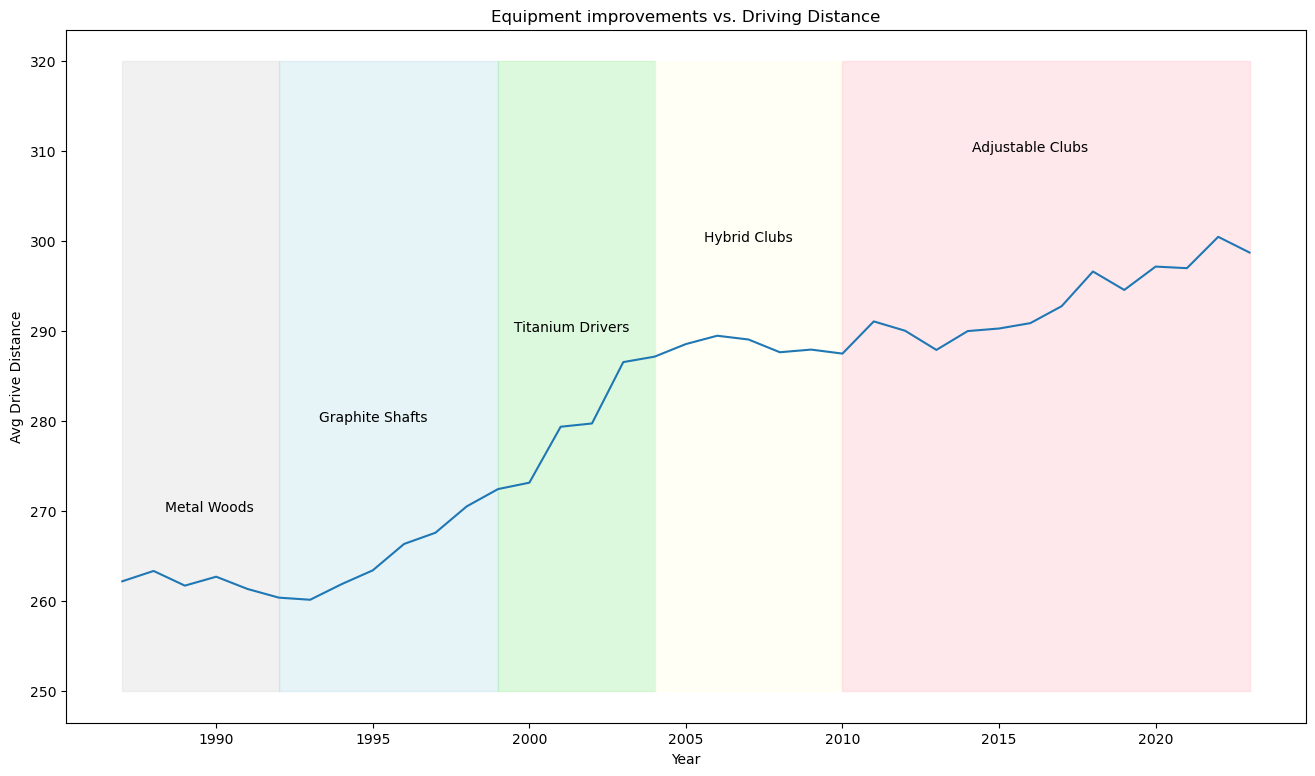

In [7]:
# From the 'final.py' file...
# Get the vis displaying avg drive distance with club changes
f.get_club_changes(df_by_yr)

Here we see significant changes to golf clubs compared to average tour player driver distance.

<b>Have changes to golf balls influenced driving distance?</b> 

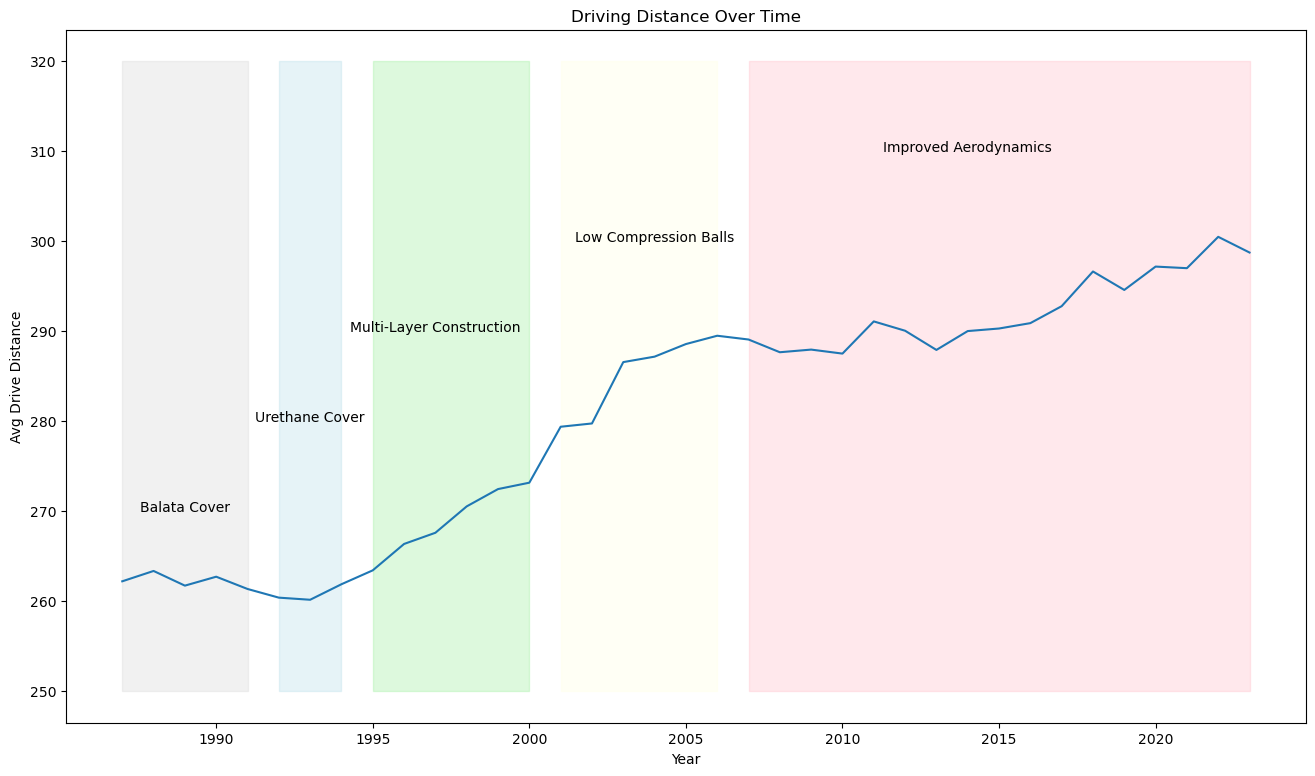

In [8]:
# From the 'final.py' file...
# Get the vis displaying avg drive distance with ball changes
f.get_ball_changes(df_by_yr)

Here we see significant changes to golf balls compared to average tour player driver distance.

<h3><b>Visualization Summary</b></h3>
<li><a href='#explore'>Exploration Top</a></li>

- We can see that driving distances have significantly increased since the late 70's, by nearly 14%, while par 4 scores have improved only about 1%. Par 5 scores however, appear to be the most significantlly impacted by the driving distance increase as scores have improved 2.6%


- By observing the previous 2 visualizations, we can feel confident that the combonation of titanium drivers and low compression golf balls significantly impacted average driver distance. Roughly a 20 yard increase was observed in this period.  

---

## Regression Analysis

**Regression analysis is a way of understanding how one variable (the "dependent" variable) changes when other variables (the "independent" variables) change. In this case, we're looking at how the average score on par 4 and par 5 holes (the dependent variables) change when the average driving distance (the independent variable) changes.**

**The coefficient of the independent variable (in this case, the driving distance) tells us how much the dependent variable (the scoring average) is expected to change when the independent variable increases by one unit.** 

**The mean squared error is a measure of how well the model fits the data. It's the average of the squared differences between the predicted and actual values. A lower value means the model fits the data better.**

**The coefficient of determination, also known as R-squared, tells us what proportion of the variation in the dependent variable can be explained by the independent variable(s). For example, an R-squared of 0.50 means that 50% of the variation in par 5 scoring average can be explained by the driving distance.**

In [9]:
# From the 'final.py' file...
# Call function to produce regression analysis results for par 4 data
f.get_par4_reg_analysis(df)

Coefficients: 
 [-0.00079054]
Mean squared error: 0.00
Coefficient of determination: 0.06


- The coefficient of 'drive_avg' is approximately -0.00079. This means that for each additional yard in the average driving distance, the par 4 scoring average improves by about 0.00079. This is a very small change, suggesting that while there is a negative relationship between driving distance and par 4 scoring average, the effect is quite small.


- The mean squared error of the model on the test set is approximately 0.00. This is a measure of the average squared difference between the predicted and actual values, with lower values indicating a better fit.


- The coefficient of determination (R-squared) is approximately 0.06. This value ranges from 0 to 1 and represents the proportion of the variance in the dependent variable that is predictable from the independent variable(s). A value of 0.06 suggests that about 6% of the variation in par 4 scoring average can be explained by the driving distance.

---

In [10]:
# From the 'final.py' file...
# Call function to produce regression analysis results for par 5 data
f.get_par5_reg_analysis(df)

Coefficients: 
 [-0.00259515]
Mean squared error: 0.00
Coefficient of determination: 0.28


- The coefficient of 'drive_avg' is approximately -0.0026. This means that for each additional yard in the average driving distance, the par 5 scoring average improves by about 0.0026. This is a very small change, suggesting that while there is a negative relationship between driving distance and par 5 scoring average, the effect is quite small.


- The mean squared error of the model on the test set is approximately 0.00. This is a measure of the average squared difference between the predicted and actual values, with lower values indicating a better fit.


- The coefficient of determination (R-squared) is approximately 0.28. This value ranges from 0 to 1 and represents the proportion of the variance in the dependent variable that is predictable from the independent variable(s). A value of 0.28 suggests that about 28% of the variation in par 5 scoring average can be explained by the driving distance.

---

<a id='exploresummary'></a>
<h3><b>Analysis Summary</b></h3>
<li><a href='#explore'>Exploration Top</a></li>

<b>Simply put, the regression analysis is telling us that there is a relationship between driving distance and scoring average: as driving distance increases, scoring average tends to decrease. However, the relationship is not very strong, and driving distance only explains a small portion of the variation in scoring average. It's important to keep in mind we are looking at the complete tour average. It is possible that analyzing the top percentage of players could yeild much different results compared to the entirety of the tour.</b> 

---

<div style='background-color: cyan'>
<a id='model'></a>
    <b><u><i><h1 style='text-align: center'>
        Modeling
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#baseline'>Baseline</a></li>
<li><a href='#modeltable'>Models Table</a></li>
<li><a href='#bestmodel'>Best Model</a></li>

In [11]:
train, validate, test = f.model_prep()

<a id='baseline'></a>
<h3><b>Baseline</b></h3>
<li><a href='#model'>Modeling Top</a></li>

In [12]:
# From the 'final.py' file...
# Call function to perform all baseline testing and return top results
f.compute_moving_avg(train, validate)[0:1]

,model_type,target_var,rmse
0,3_year_moving_avg,drive_avg,3.51


### Baseline RMSE:  3.51

---

<a id='bestmodel'></a>
<h3><b>Best Model</b></h3>
<li><a href='#model'>Modeling Top</a></li>

### Validate

drive_avg -- RMSE: 2.87


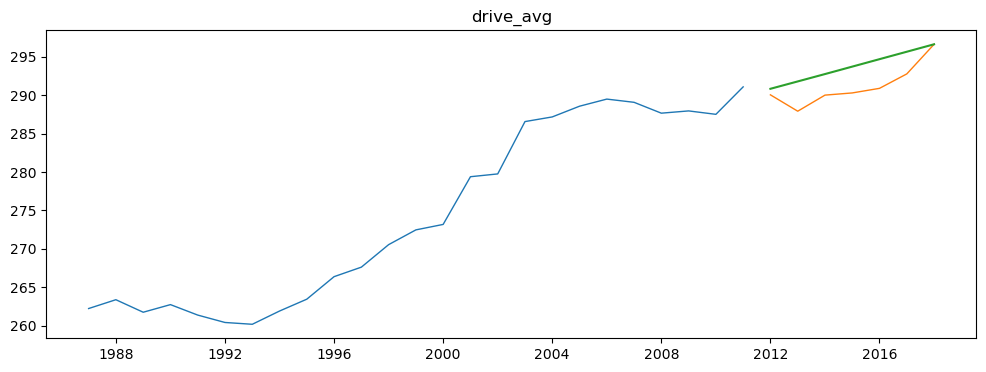

In [13]:
# From the 'final.py' file...
# Return RMSE and visualization of predictions on validate set
f.train_val_best_model(train, validate)

{METRIC HERE}:

{EXPLANATION OF REASONING HERE}

### Test

FINAL PERFORMANCE OF MODEL ON TEST DATA
rmse- drive_avg:  2.2733799923091227
rmse- par_4_avg:  0.019431165457442383
rmse- par_5_avg:  0.011596302517951828


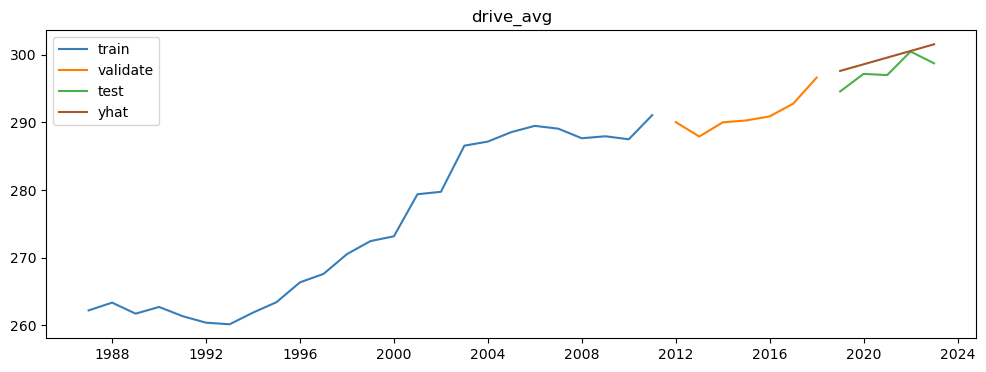

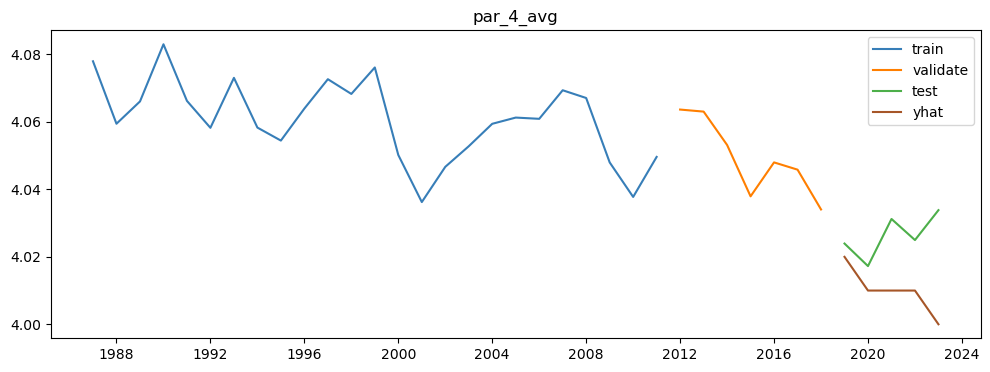

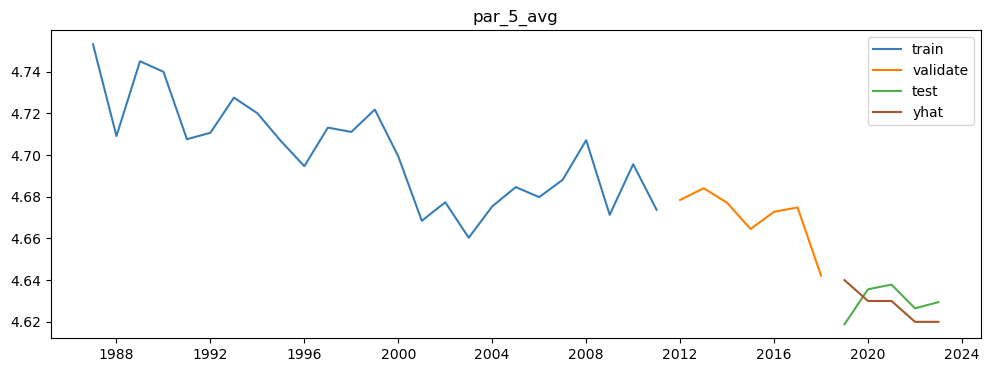

In [14]:
# From the 'final.py' file...
# Return RMSE and visualization of predictions on test set
f.test_best_model(train, validate, test)

---

<div style='background-color: cyan'>
<a id='conclusion'></a>
    <b><u><i><h1 style='text-align: center'>
        Conclusion
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#conclusionsummary'>Summary</a></li>
<li><a href='#rec'>Recommendations</a></li>
<li><a href='#nextsteps'>Next-Steps</a></li>

<a id='conclusionsummary'></a>
<h3><b>Summary</b></h3>
<li><a href='#conclusion'>Conclusion Top</a></li>

SUMMARY HERE

---

<a id='rec'></a>
<h3><b>Recommendations</b></h3>
<li><a href='#conclusion'>Conclusion Top</a></li>

RECOMMENDATIONS HERE

---

<a id='nextsteps'></a>
<h3><b>Next-Steps</b></h3>
<li><a href='#conclusion'>Conclusion Top</a></li>

NEXT-STEPS HERE